## Section - Seaborn Plots

### Part I (Distribution Plots)

In [1]:
# Import necessary libraries and allow plots to be displayed inline

import seaborn as sns
%matplotlib inline

#### (1) How to load in the tips dataset from seaborn

In [2]:
# Use the .load_dataset() method to load in the tips dataset
tips = sns.load_dataset('tips')
tips.head(10)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [3]:
# Describe the dataset; 244 records in the set
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [4]:
# Gain info about the dataset
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.2 KB


#### (2) How to display the distribution of a single variable

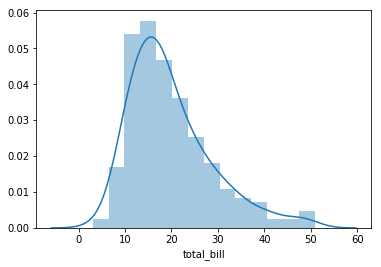

In [5]:
# Use the .distplot() method to display the distribution of a single variable
sns.distplot(tips['total_bill'])

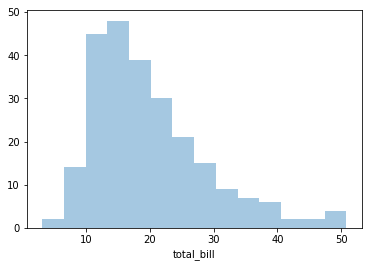

In [6]:
# Pass in the kde parameter to remove the kernel density estimation line
sns.distplot(tips['total_bill'], kde=False)

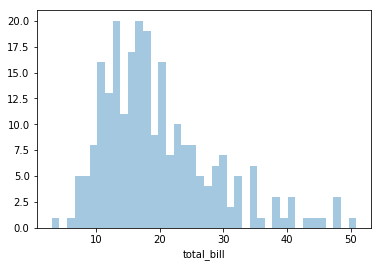

In [7]:
# Pass in the bins parameter to adjust the bin sizes for the histogram
sns.distplot(tips['total_bill'], kde=False, bins=40)

#### (3) How to display the distribution of a multi-variate

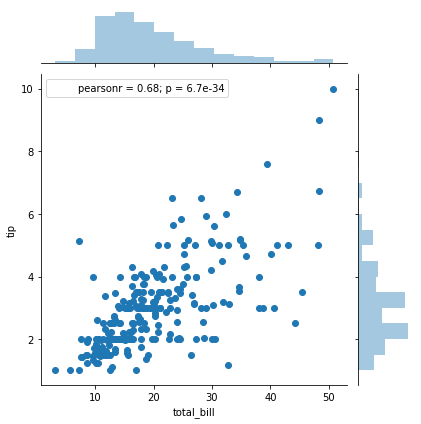

In [8]:
# Use the .jointplot() method to compare multiple columns of data
sns.jointplot(x='total_bill', y='tip', data=tips)

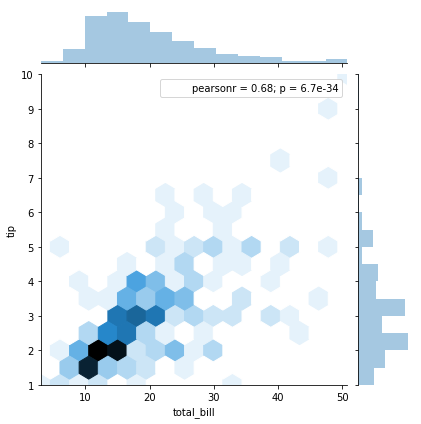

In [9]:
# Use the .jointplot() method with the kind parameter to adjust plot to hex
sns.jointplot(x='total_bill', y='tip', data=tips, kind='hex')

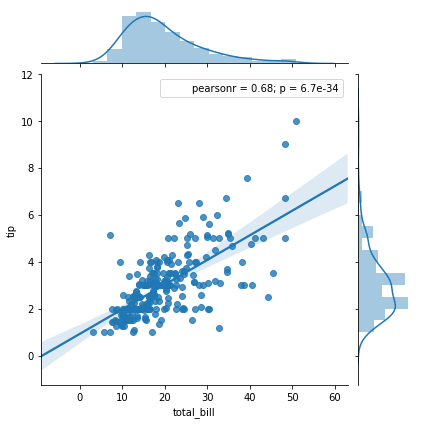

In [10]:
# Use the .jointplot() method with the kind parameter of 'reg' for regresion to adjust plot
sns.jointplot(x='total_bill', y='tip', data=tips, kind='reg')

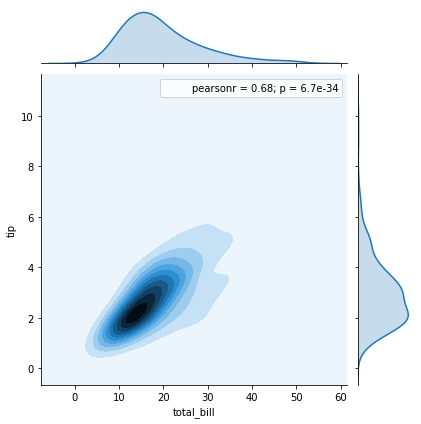

In [11]:
# Use the .jointplot() method with the kind parameter of 'kde' for 2-dimensional plot
sns.jointplot(x='total_bill', y='tip', data=tips, kind='kde')

#### (4) How to display the distribution comparison across pairwise relationships of dataset

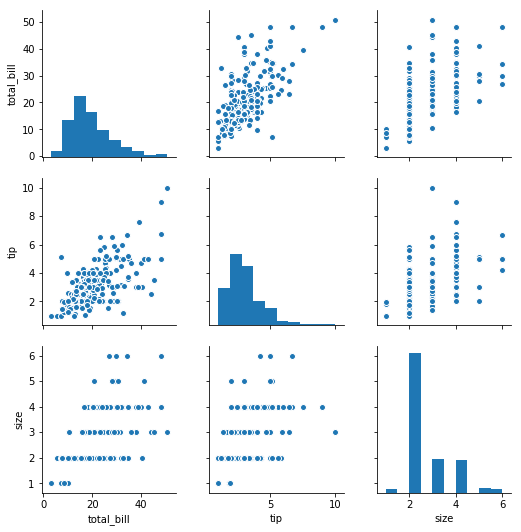

In [12]:
# Use the .pairplot() method to compare relationships across numerical series in the dataset
sns.pairplot(tips)

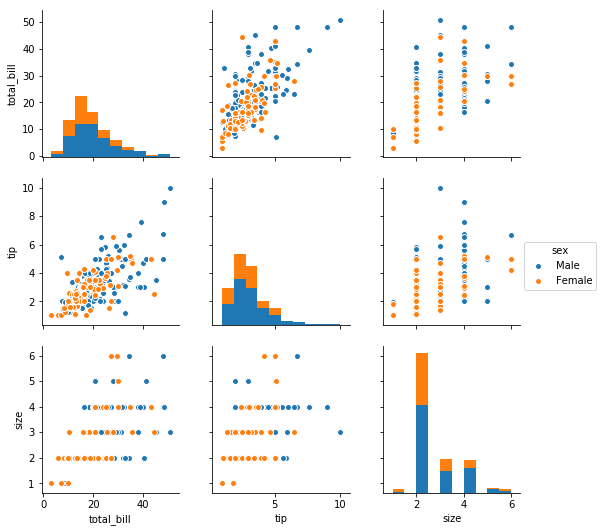

In [13]:
# Use the .pairplot() method to compare relationships across numerical series in the dataset w/ the hue argument to
# add categorical elements to the plots

sns.pairplot(tips, hue='sex')

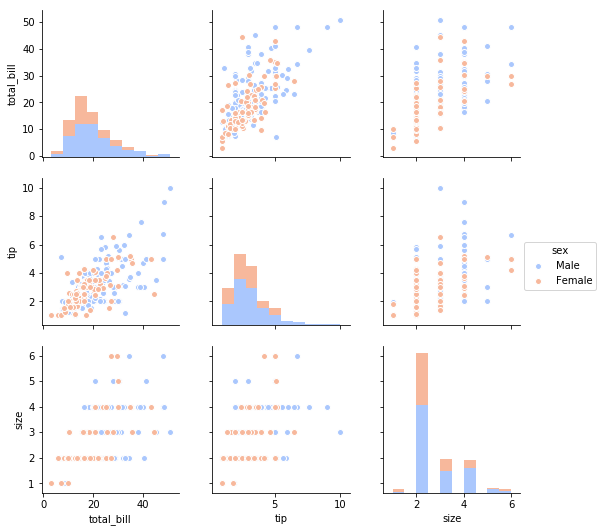

In [14]:
# Use the .pairplot() method to compare relationships across numerical series in the dataset w/ the palette argument to
# adjust the color

sns.pairplot(tips, hue='sex', palette='coolwarm')

#### (5) How to display the distribution of series data with dashed lines using the rugplot

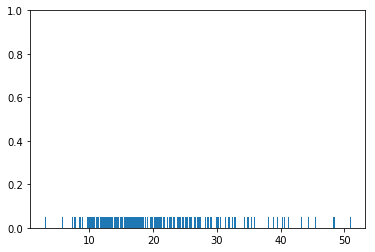

In [15]:
# Use the .rugplot() method with one column passed into it
sns.rugplot(tips['total_bill'])

#### (6) How to display the distribution with KDE

(0, 1)

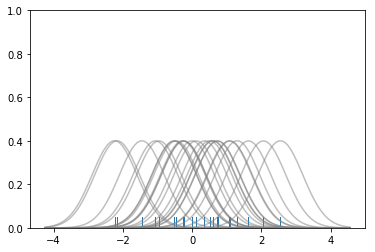

In [16]:
# Don't worry about understanding this code!
# It's just for the diagram below
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset -> create random number of values for dataset
dataset = np.random.randn(25)

# Create another rugplot -> Used to plot dashed lines
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

Text(0.5,0.98,'Sum of the Basis Functions')

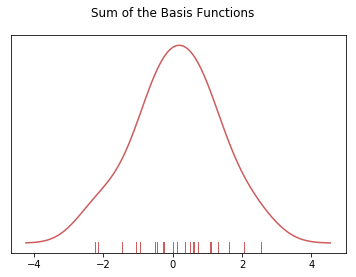

In [17]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

#### (7) How to display the KDE plot

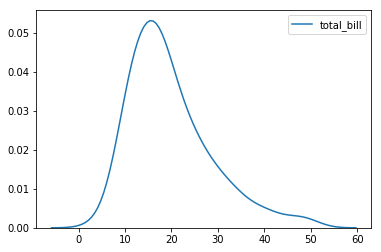

In [18]:
# Use the .kdeplot() method to remove the histogram and only display the KDE
sns.kdeplot(tips['total_bill'])

### Part I (Categorical Plots)